## Optimal state discrimination example

We have a source that produces a collection of states $\rho_x$ with probability $p(x)$. We want to find a measurement so that we can deduce with the highest probability possible which state was sent to us. 

In the binary case (two possible states) this was solved analytically by the Holevo-Helstrom theorem. But for more states there are no general analytical expressions for the best measurement. 

We want to solve 
$$
\begin{aligned}
\max & \quad \sum_x p(x) \mathrm{Tr}[\rho_x M_x] \\
\mathrm{s.t.} & \quad \sum_x M_x = \mathbb{I} \\
& \quad M_x \geq 0 \qquad \forall x.
\end{aligned}
$$
where the objective function is the probability that we correctly guess the outcome of the source when we perform the POVM $\{M_x\}_x$. Maximizing over all POVMs is an SDP and so we can find the optimal measurement!.

## Example 1

Suppose the source produces with uniform probability states in an equilateral triangle in the Z-X plane of the Bloch sphere. I.e., 
$$
\rho_0 = \begin{pmatrix} 1 & 0 \\ 0 & 0 \end{pmatrix} \qquad \rho_1 = \begin{pmatrix} 1/4 & \sqrt{3}/4 \\ \sqrt{3}/4 & 3/4 \end{pmatrix} \qquad \rho_2 =  \begin{pmatrix} 1/4 & -\sqrt{3}/4 \\ -\sqrt{3}/4 & 3/4 \end{pmatrix}.
$$

Let's find the best measurement to distinguish them! 

In [1]:
import picos as pic # Python package to optimize SDPs
import numpy as np
from math import sqrt
np.set_printoptions(precision=4, suppress = True)

# Define the states
rho0 = pic.Constant([
    [1, 0],
    [0, 0]
])
rho1 = pic.Constant([
    [1/4, sqrt(3)/4],
    [sqrt(3)/4, 3/4]
])
rho2 = pic.Constant([
    [1/4, -sqrt(3)/4],
    [-sqrt(3)/4, 3/4]
])

# Define the SDP 
SDP = pic.Problem()
# Measurement operator variable 
M = [pic.HermitianVariable('M'+str(k), [2,2]) for k in range(3)]
# Define objective 
SDP.set_objective('max', 1/3 * pic.trace(rho0 * M[0] + rho1 * M[1] + rho2 * M[2]))
# Define constraints 
for k in range(3):
    SDP.add_constraint( M[k] >> 0 ) # PSD constraint
SDP.add_constraint(M[0] + M[1] + M[2] == [[1,0],[0,1]])

print(SDP)





Complex Semidefinite Program
  maximize 0.333333·tr([2×2]·M0 + [2×2]·M1 + [2×2]·M2)
  over
    2×2 hermitian variable Mi ∀ i ∈ [0…2]
  subject to
    M0 ≽ 0
    M1 ≽ 0
    M2 ≽ 0
    M0 + M1 + M2 = [2×2]


In [2]:
# Then let's solve it 

SDP.solve()

print('Optimal value: ', round(SDP, 4))
print('Optimal measuements: ')
for k in range(3):
    print(np.array(M[k].value))

Optimal value:  0.6667
Optimal measuements: 
[[ 0.6666+0.j -0.    +0.j]
 [-0.    +0.j  0.    +0.j]]
[[0.1667+0.j 0.2887+0.j]
 [0.2887+0.j 0.5   +0.j]]
[[ 0.1667+0.j -0.2887+0.j]
 [-0.2887+0.j  0.5   +0.j]]


### Solution

From the numerics the solution is quite simple in this case. The optimal meausements are just 
$$
M_0 = \frac{2}{3} \rho_0 \qquad M_1 = \frac23 \rho_1 \qquad M_2 = \frac23 \rho_2
$$

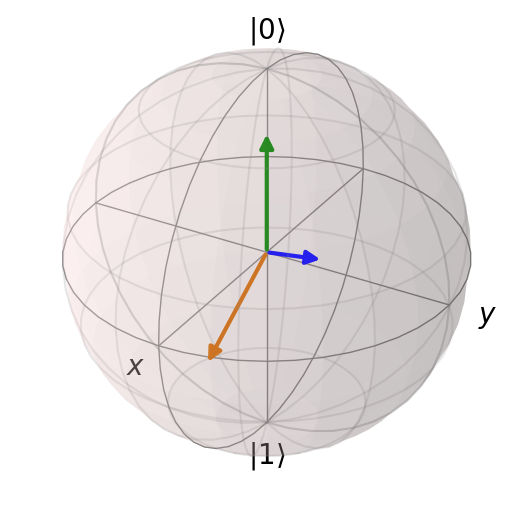

In [4]:
import qutip as qtp
id = np.eye(2)
sx = np.array([[0,1],[1,0]])
sy = np.array([[0,-1j],[1j,0]])
sz = np.array([[1,0],[0,-1]])
    
def mat2bv(mat):    
    ci = np.real(np.matmul(id, mat).trace())
    cx = np.real(np.matmul(sx, mat).trace())
    cy = np.real(np.matmul(sy, mat).trace())
    cz = np.real(np.matmul(sz, mat).trace())
    
    return [ci,cx,cy,cz]

b = qtp.Bloch()
for k in range(3):
    [ci,cx,cy,cz] = mat2bv(np.array(M[k].value))
    b.add_vectors([cx,cy,cz])
b.show()

## Example 2

What if we are instead sent uniformly either $|0\rangle, |+\rangle$ or $|i\rangle$. What's the best measurement to help distinguish them? 



In [5]:
import picos as pic # Python package to optimize SDPs
import numpy as np
from math import sqrt
np.set_printoptions(precision=4, suppress = True)

# Define the states
rho0 = pic.Constant([
    [1, 0],
    [0, 0]
])
rho1 = pic.Constant([
    [1/2, 1/2],
    [1/2, 1/2]
])
rho2 = pic.Constant([
    [1/2, -1j/2],
    [1j/2, 1/2]
])

# Define the SDP 
SDP = pic.Problem()
# Measurement operator variable 
M = [pic.HermitianVariable('M'+str(k), [2,2]) for k in range(3)]
# Define objective 
SDP.set_objective('max', 1/3 * pic.trace(rho0 * M[0] + rho1 * M[1] + rho2 * M[2]))
# Define constraints 
for k in range(3):
    SDP.add_constraint( M[k] >> 0 ) # PSD constraint
SDP.add_constraint(M[0] + M[1] + M[2] == [[1,0],[0,1]])

print(SDP)

Complex Semidefinite Program
  maximize 0.333333·tr([2×2]·M0 + [2×2]·M1 + [2×2]·M2)
  over
    2×2 hermitian variable Mi ∀ i ∈ [0…2]
  subject to
    M0 ≽ 0
    M1 ≽ 0
    M2 ≽ 0
    M0 + M1 + M2 = [2×2]


In [6]:
# Then let's solve it 

SDP.solve()
print(SDP.status)

print('Optimal value: ', round(SDP, 4))
print('Optimal measuements: ')
for k in range(3):
    print(np.array(M[k].value))

optimal
Optimal value:  0.6055
Optimal measuements: 
[[ 0.6055+0.j     -0.1361+0.1361j]
 [-0.1361-0.1361j  0.0612+0.j    ]]
[[0.1973+0.j     0.2722+0.1361j]
 [0.2722-0.1361j 0.4694+0.j    ]]
[[ 0.1973+0.j     -0.1361-0.2722j]
 [-0.1361+0.2722j  0.4694+0.j    ]]


-0.2721612880769186 -0.2721612880769299 0.5443225761537911
0.5443352893711083 -0.2721740012941353 -0.27216128807688383
-0.2721740012941897 0.5443352893710652 -0.2721612880769073


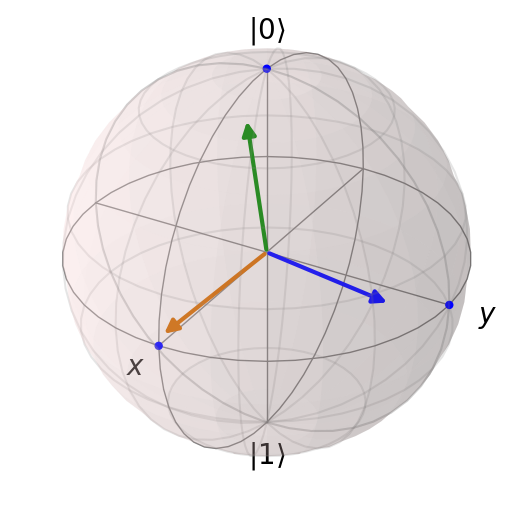

In [9]:
import qutip as qtp
id = np.eye(2)
sx = np.array([[0,1],[1,0]])
sy = np.array([[0,-1j],[1j,0]])
sz = np.array([[1,0],[0,-1]])
    
def mat2bv(mat):    
    ci = np.real(np.matmul(id, mat).trace())
    cx = np.real(np.matmul(sx, mat).trace())
    cy = np.real(np.matmul(sy, mat).trace())
    cz = np.real(np.matmul(sz, mat).trace())
    
    return [ci,cx,cy,cz]

b = qtp.Bloch()
b.add_points([[1,0,0],[0,1,0],[0,0,1]])
for k in range(3):
    [ci,cx,cy,cz] = mat2bv(np.array(M[k].value))
    print(cx,cy,cz)
    b.add_vectors([cx,cy,cz])
b.show()